# Precision and Recall

credit card dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./EP_datasets/creditcard.csv", low_memory=False, encoding="cp1252")
print(f"#rows={len(df)} #columns={len(df.columns)}")

# pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
# Print some info and plots to get a feeling about the dataset
print(df.dtypes)

#rows=284807 #columns=31
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check if we have any '?' in df values
print(df.columns[df.isin(["?"]).any()])
# Check if we have any NaN in df values
print(df.columns[df.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


Class
0    284315
1       492
Name: count, dtype: int64

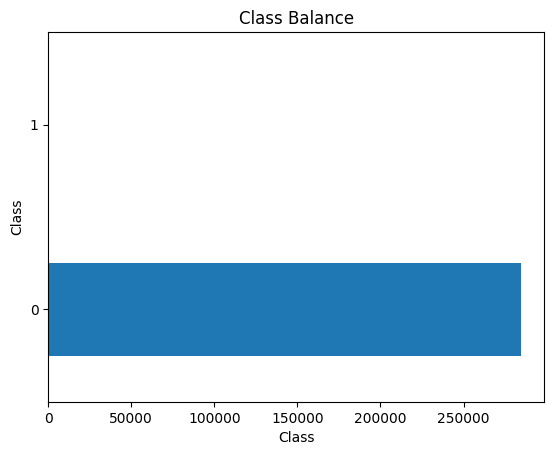

In [4]:
display(df["Class"].value_counts())

df["Class"].value_counts().plot(kind="barh", xlabel="Class", title="Class Balance");

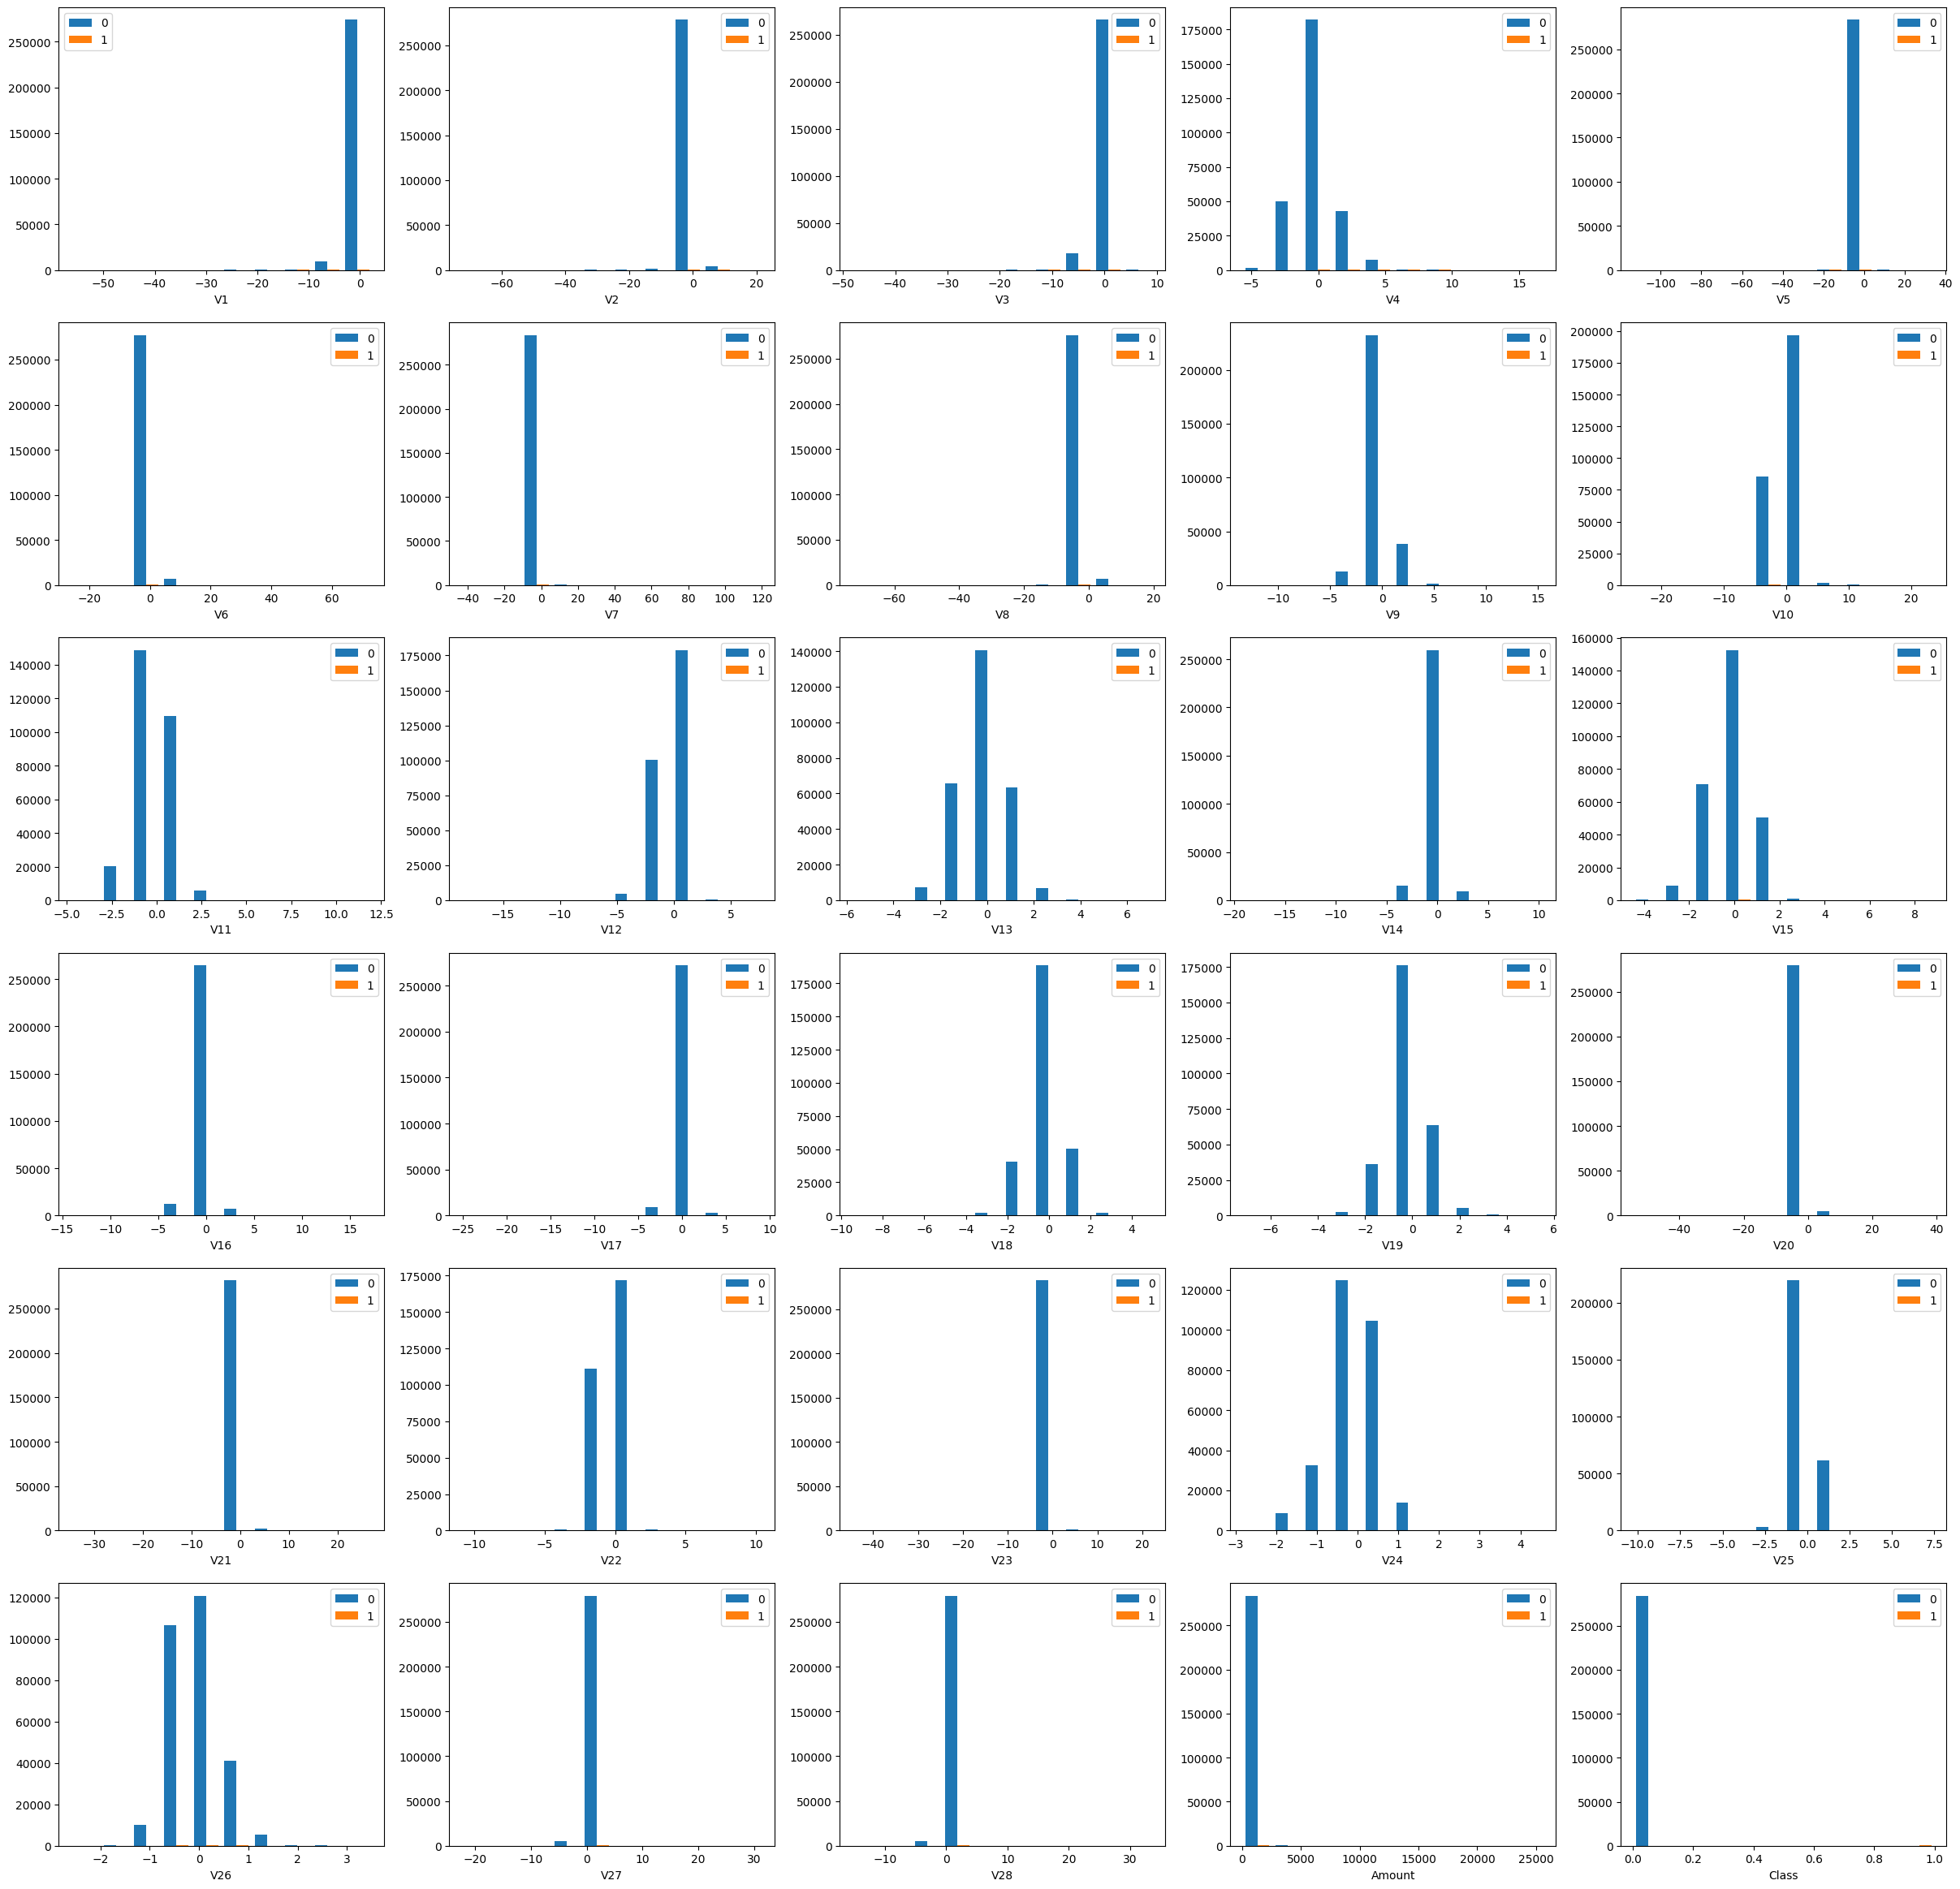

In [5]:
def plt_var(_col):
    plt.hist([df[df["Class"] == 0][_col], df[df["Class"] == 1][_col]], label=["0", "1"])
    plt.xlabel(_col)
    plt.legend()


plt.figure(figsize=(30, 100))

for i in range(len(df.columns) - 1):
    plt.subplot(20, 5, i + 1)
    plt_var(df.columns[i + 1])

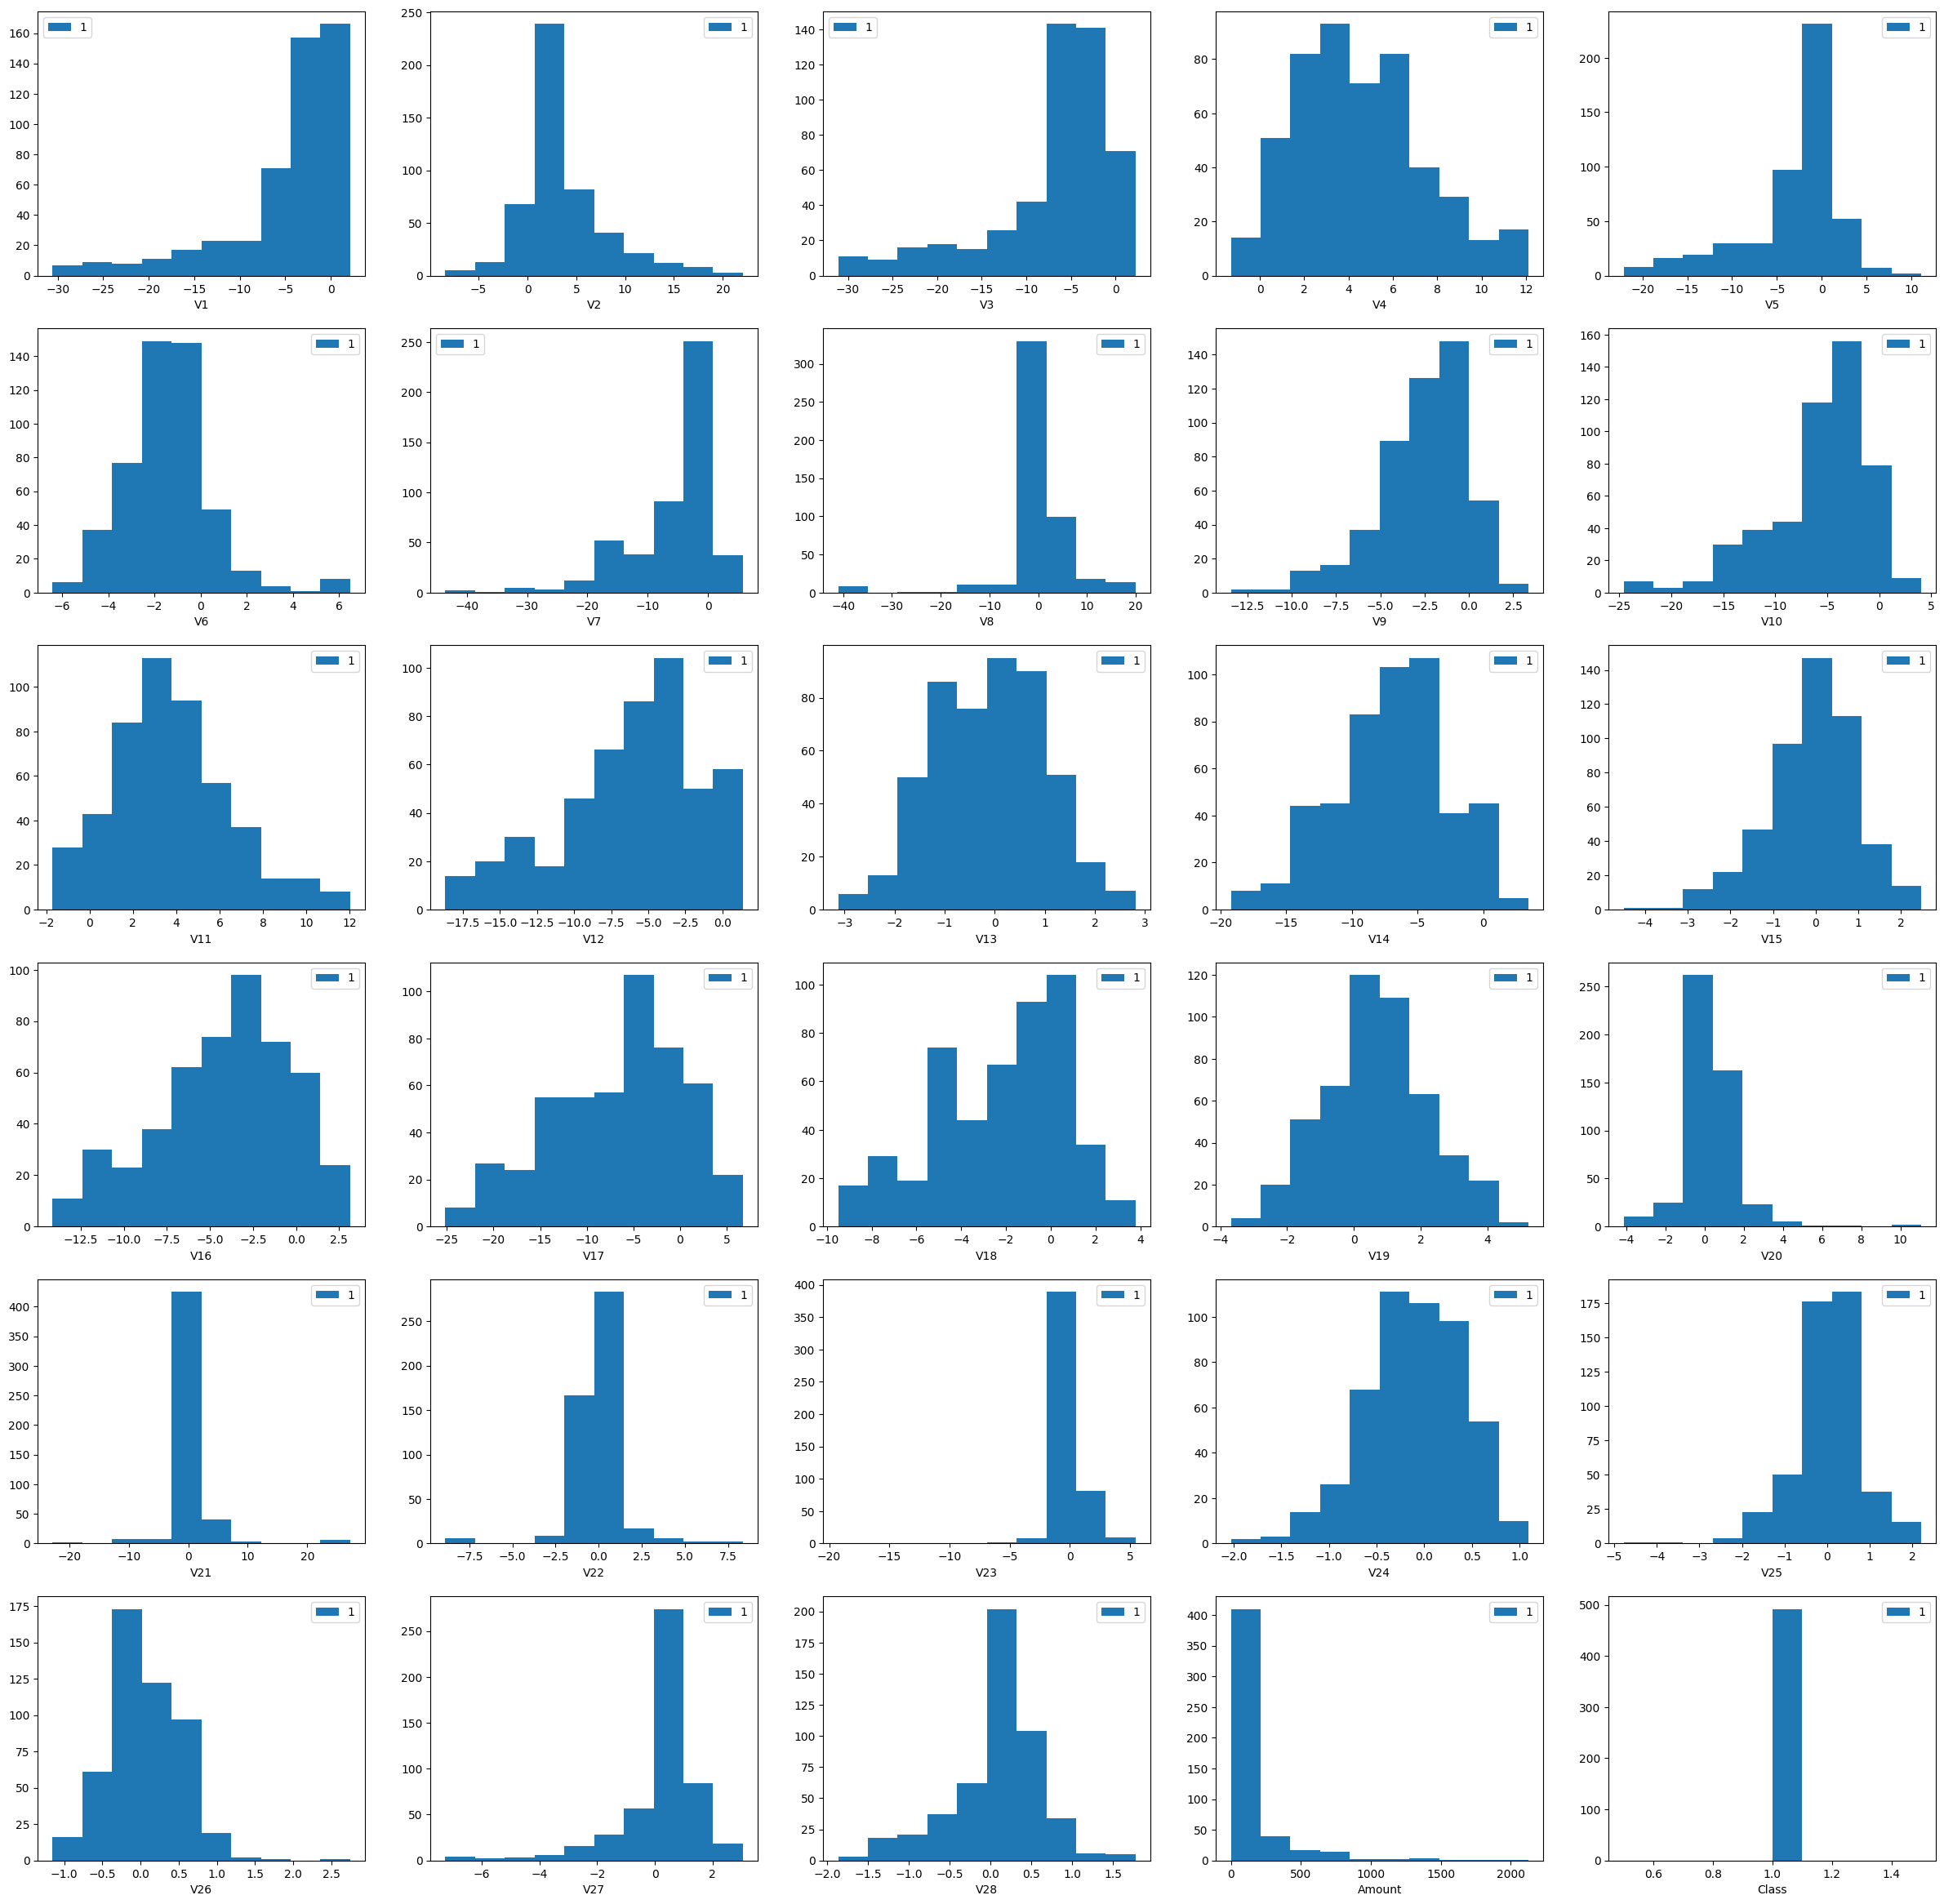

In [6]:
def plt_var(_col):
    plt.hist([df[df["Class"] == 1][_col]], label=["1"])
    plt.xlabel(_col)
    plt.legend()


plt.figure(figsize=(30, 100))

for i in range(len(df.columns) - 1):
    plt.subplot(20, 5, i + 1)
    plt_var(df.columns[i + 1])

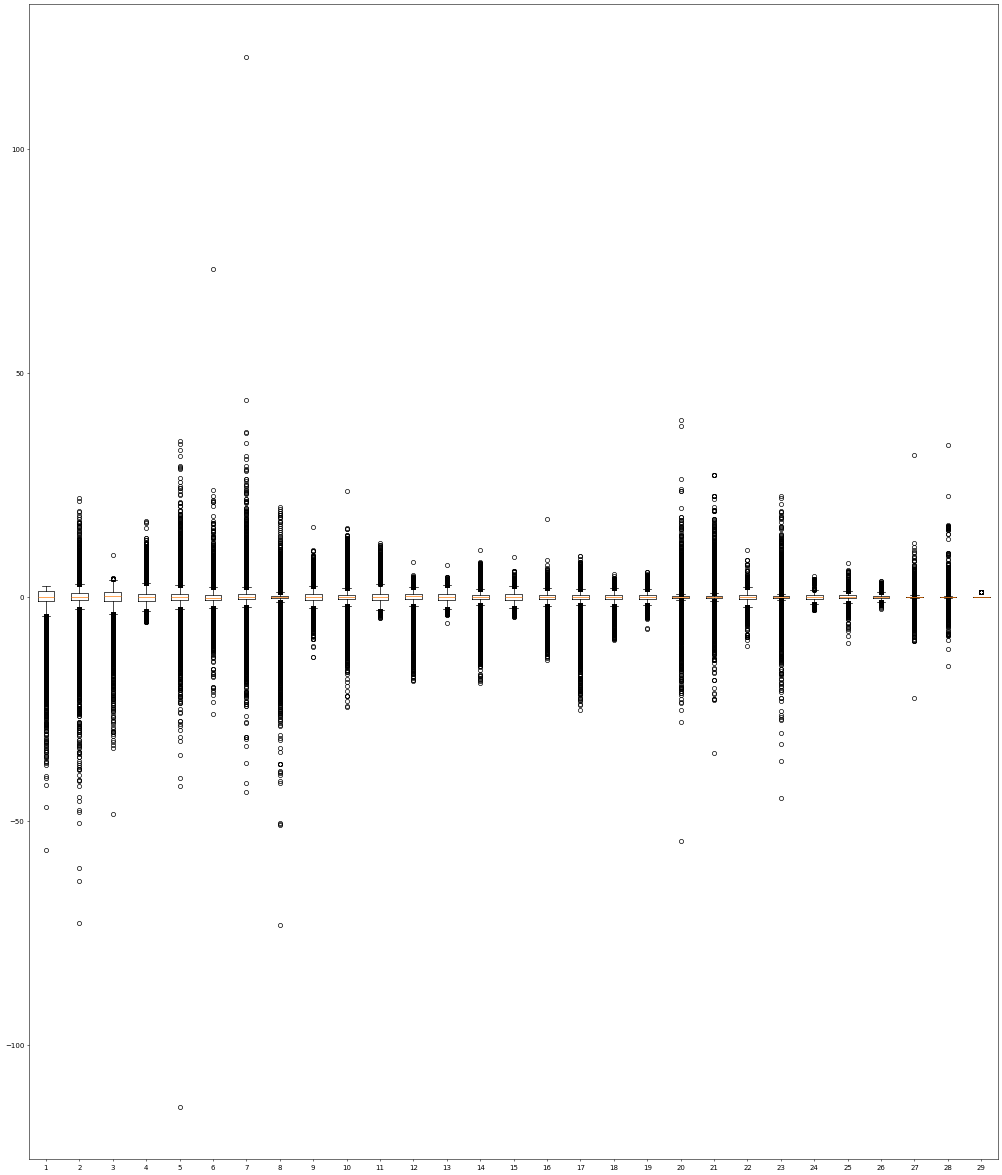

In [7]:
fig = plt.figure(figsize=(25, 30), dpi=50, facecolor="w", edgecolor="k")
plt.boxplot(df.loc[:, ~df.columns.isin(["Time", "Amount"])])
plt.show()

In [8]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score,
    PrecisionRecallDisplay,
    classification_report,
)

X = df.loc[:, ~df.columns.isin(["Time", "Amount", "Class"])].values
y = df.loc[:, df.columns == "Class"].values.ravel()

# 50% split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=1
)

c:\Users\zador\Documents\Training\applied-ml-experiments\.venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


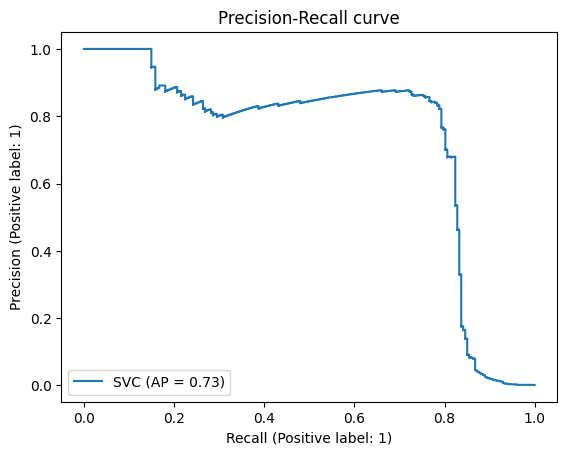

In [9]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(max_iter=100000, dual=True)
clf_svc.fit(X_train, y_train)

display = PrecisionRecallDisplay.from_estimator(clf_svc, X_test, y_test, name="SVC")
_ = display.ax_.set_title("Precision-Recall curve")

In [10]:
y_pred = clf_svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.87      0.60      0.71       227

    accuracy                           1.00    142404
   macro avg       0.93      0.80      0.86    142404
weighted avg       1.00      1.00      1.00    142404



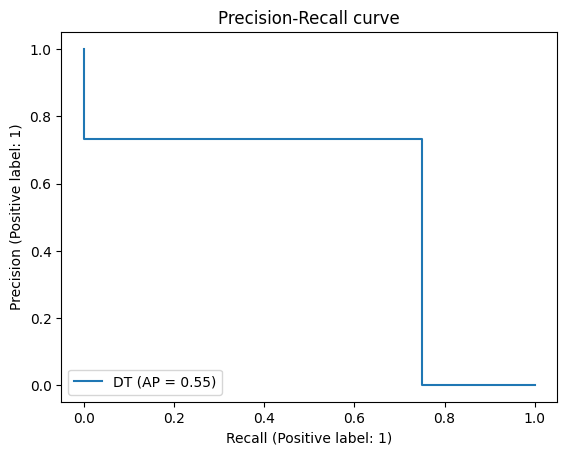

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, y_train)

display = PrecisionRecallDisplay.from_estimator(clf_DT, X_test, y_test, name="DT")
_ = display.ax_.set_title("Precision-Recall curve")

In [12]:
y_pred = clf_DT.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.73      0.75      0.74       227

    accuracy                           1.00    142404
   macro avg       0.87      0.87      0.87    142404
weighted avg       1.00      1.00      1.00    142404



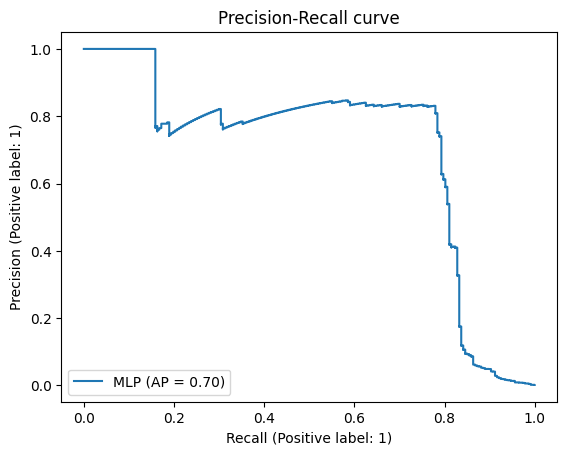

In [13]:
from sklearn.neural_network import MLPClassifier

clf_MLP = MLPClassifier(alpha=1)
clf_MLP.fit(X_train, y_train)

display = PrecisionRecallDisplay.from_estimator(clf_MLP, X_test, y_test, name="MLP")
_ = display.ax_.set_title("Precision-Recall curve")

In [14]:
y_pred = clf_MLP.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.83      0.51      0.63       227

    accuracy                           1.00    142404
   macro avg       0.92      0.76      0.82    142404
weighted avg       1.00      1.00      1.00    142404



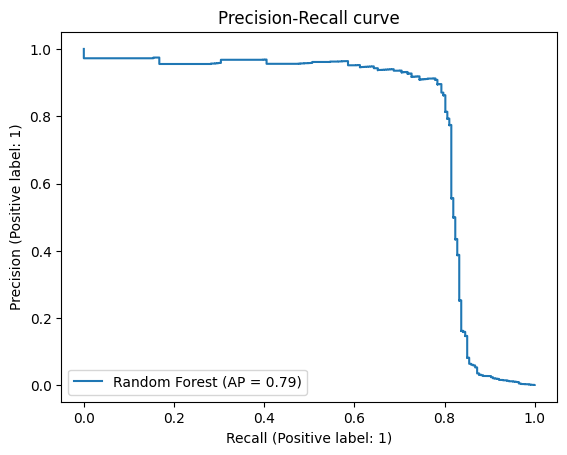

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(max_depth=10, n_estimators=25)
clf_RF.fit(X_train, y_train)

display = PrecisionRecallDisplay.from_estimator(
    clf_RF, X_test, y_test, name="Random Forest"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [16]:
y_pred = clf_RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.91      0.74      0.82       227

    accuracy                           1.00    142404
   macro avg       0.96      0.87      0.91    142404
weighted avg       1.00      1.00      1.00    142404



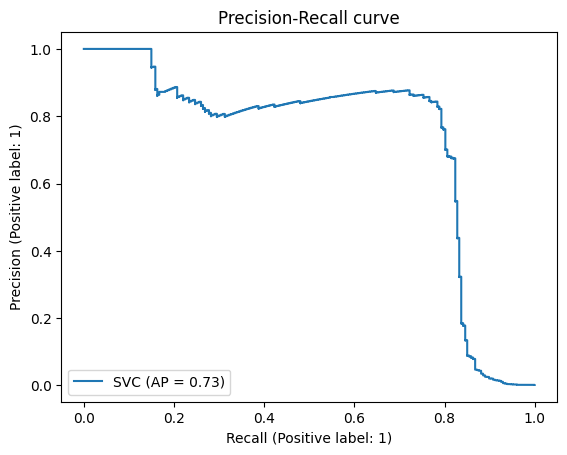

In [17]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(C=0.1, max_iter=100000, dual=True)
clf_svc.fit(X_train, y_train)

display = PrecisionRecallDisplay.from_estimator(clf_svc, X_test, y_test, name="SVC")
_ = display.ax_.set_title("Precision-Recall curve")

In [18]:
y_pred = clf_svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.87      0.60      0.71       227

    accuracy                           1.00    142404
   macro avg       0.93      0.80      0.86    142404
weighted avg       1.00      1.00      1.00    142404



In [19]:
path = clf_DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

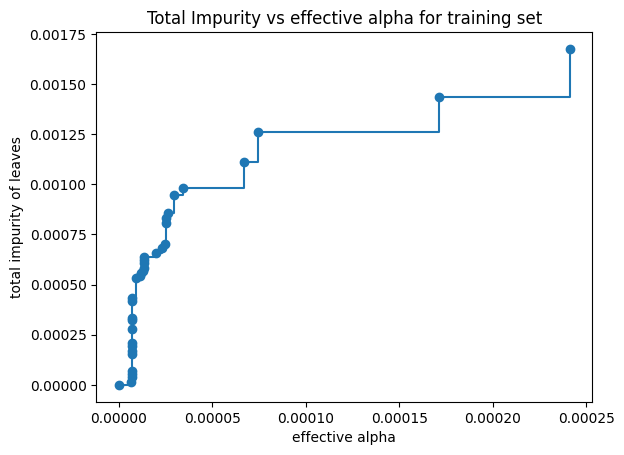

In [20]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

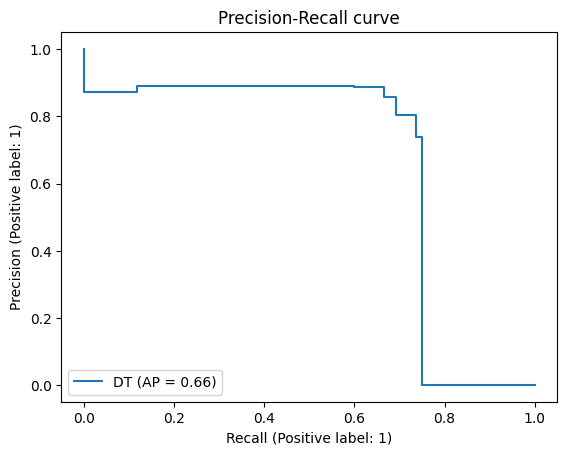

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier(ccp_alpha=0.00005)
clf_DT.fit(X_train, y_train)

display = PrecisionRecallDisplay.from_estimator(clf_DT, X_test, y_test, name="DT")
_ = display.ax_.set_title("Precision-Recall curve")

In [22]:
y_pred = clf_DT.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.86      0.69      0.77       227

    accuracy                           1.00    142404
   macro avg       0.93      0.85      0.88    142404
weighted avg       1.00      1.00      1.00    142404



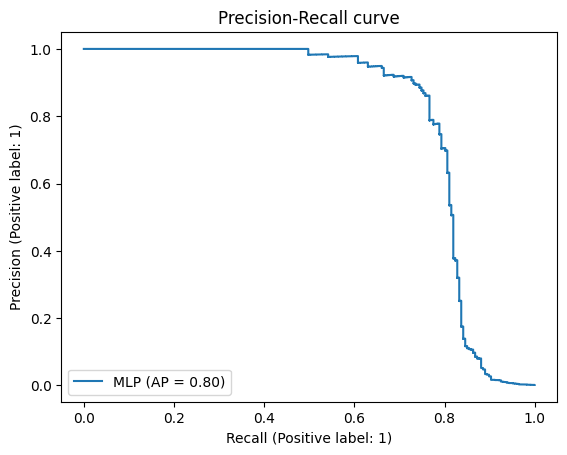

In [23]:
from sklearn.neural_network import MLPClassifier

clf_MLP = MLPClassifier(alpha=0.00001)
clf_MLP.fit(X_train, y_train)

display = PrecisionRecallDisplay.from_estimator(clf_MLP, X_test, y_test, name="MLP")
_ = display.ax_.set_title("Precision-Recall curve")

In [24]:
y_pred = clf_MLP.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.84      0.77      0.80       227

    accuracy                           1.00    142404
   macro avg       0.92      0.88      0.90    142404
weighted avg       1.00      1.00      1.00    142404



In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch

print(f"PyTorch version= {torch.__version__}")
print(f"CUDA available= {torch.cuda.is_available()}")

PyTorch version= 2.1.2+cu121
CUDA available= True


In [26]:
class PyTorchMLP(torch.nn.Module):  # One hidden layer
    def __init__(self, n_hidden=200, epochs=100, eta=0.001, minibatch_size=50, seed=0):
        super(PyTorchMLP, self).__init__()
        self.random = np.random.RandomState(seed)  # shuffle mini batches
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = (
            minibatch_size  # size of training batch - 1 would not work
        )
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.model = None

    def init_layers(self, _M, _K):
        self.model = torch.nn.Sequential(
            torch.nn.Linear(_M, self.n_hidden),
            torch.nn.Sigmoid(),
            torch.nn.Linear(self.n_hidden, self.n_hidden),
            torch.nn.Sigmoid(),
            torch.nn.Linear(self.n_hidden, _K),
        )

    def predict(self, _X):
        _X = torch.FloatTensor(_X)
        assert self.model != None
        self.model.eval()
        with torch.no_grad():
            y_pred = np.argmax(self.model(_X), axis=1)
        self.model.train()
        return y_pred.numpy()

    def fit(self, _X_train, _y_train, info=False):
        import sys

        _X_train, _y_train = torch.FloatTensor(_X_train), torch.LongTensor(_y_train)
        n_features = _X_train.shape[1]
        n_output = np.unique(_y_train).shape[0]  # number of class labels

        self.init_layers(n_features, n_output)

        self.optimizer = torch.optim.Rprop(self.model.parameters(), lr=self.eta)

        totloss = 0
        for i in range(self.epochs):
            indices = np.arange(_X_train.shape[0])
            self.random.shuffle(indices)  # shuffle the data each epoch

            for start_idx in range(
                0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size
            ):
                batch_idx = indices[start_idx : start_idx + self.minibatch_size]
                self.optimizer.zero_grad()

                net_out = self.model(_X_train[batch_idx])

                loss = self.loss_func(net_out, _y_train[batch_idx])
                loss.backward()
                self.optimizer.step()

                if info:
                    sys.stderr.write(f"\r{i+1:03d} Loss: {loss.item():6.5f}")
                    sys.stderr.flush()
        return self

In [27]:
# A derived class to have Dropout
class MLP_2(PyTorchMLP):
    def init_layers(self, _M, _K):
        self.model = torch.nn.Sequential(
            torch.nn.Linear(_M, self.n_hidden),
            torch.nn.Sigmoid(),
            torch.nn.Dropout(0.3),
            torch.nn.Linear(self.n_hidden, self.n_hidden),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.3),
            torch.nn.Linear(self.n_hidden, _K),
        )

In [28]:
# Train
mlp1 = PyTorchMLP(
    n_hidden=40, epochs=100, eta=0.001, minibatch_size=X_train.shape[0]
).fit(X_train, y_train)
mlp2 = MLP_2(n_hidden=40, epochs=100, eta=0.0001, minibatch_size=X_train.shape[0]).fit(
    X_train, y_train
)

In [29]:
y_pred = mlp1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.86      0.74      0.80       227

    accuracy                           1.00    142404
   macro avg       0.93      0.87      0.90    142404
weighted avg       1.00      1.00      1.00    142404



In [30]:
y_pred = mlp2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.88      0.78      0.82       227

    accuracy                           1.00    142404
   macro avg       0.94      0.89      0.91    142404
weighted avg       1.00      1.00      1.00    142404



In [31]:
# 10-fold CV evaluation of a classifier


def eval_classifier(_clf, _X, _y):
    prec = []
    rec = []
    f1_sc = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        test = classification_report(_y[test_index], y_pred, output_dict=True)
        prec += [test["1"]["precision"]]
        rec += [test["1"]["recall"]]
        f1_sc += [test["1"]["f1-score"]]
    return np.array(prec), np.array(rec), np.array(f1_sc)

In [32]:
%%time
prec, rec, f1_sc = eval_classifier(mlp1, X, y)

print(
    f"PyTorch no dropout: precision={np.mean(prec):.2f} {chr(177)}{np.std(prec):.3f}\
    recall={np.mean(rec):.2f} {chr(177)}{np.std(rec):.3f}\
    f1-score={np.mean(f1_sc):.2f} {chr(177)}{np.std(f1_sc):.3f}"
)

PyTorch no dropout: precision=0.83 ±0.187    recall=0.72 ±0.115    f1-score=0.75 ±0.119
CPU times: total: 8min 5s
Wall time: 50.3 s


In [33]:
%%time
prec, rec, f1_sc = eval_classifier(mlp2, X, y)

print(
    f"PyTorch with dropout: precision={np.mean(prec):.2f} {chr(177)}{np.std(prec):.3f}\
    recall={np.mean(rec):.2f} {chr(177)}{np.std(rec):.3f}\
    f1-score={np.mean(f1_sc):.2f} {chr(177)}{np.std(f1_sc):.3f}"
)

PyTorch with dropout: precision=0.90 ±0.129    recall=0.75 ±0.143    f1-score=0.80 ±0.111
CPU times: total: 11min
Wall time: 1min 9s


In [34]:
%%time
prec, rec, f1_sc = eval_classifier(clf_RF, X, y)

print(
    f"Random Forest: precision={np.mean(prec):.2f} {chr(177)}{np.std(prec):.3f}\
    recall={np.mean(rec):.2f} {chr(177)}{np.std(rec):.3f}\
    f1-score={np.mean(f1_sc):.2f} {chr(177)}{np.std(f1_sc):.3f}"
)

Random Forest: precision=0.89 ±0.143    recall=0.73 ±0.139    f1-score=0.79 ±0.111
CPU times: total: 9min 14s
Wall time: 9min 15s
